# E4MMA - Plotting with h5py and matplotlib

In [1]:
import matplotlib.pyplot as plot
import os
import sys
import h5py
import numpy

plots=True
if 'pytest' in sys.modules:
    plots=False

Download a precomputed table. The file is compared with the SHA256
hash and only downloaded if the current file doesn't match the hash.
The 'acol' command is part of O2scl (one of the e4mma dependencies).
Instead of acol, you can just use, e.g. 'curl' to download the file
and 'openssl dgst -sha256' to obtain the hash.

In [2]:
os.system(('acol -download ../output/fid_3_5_22.o2 '+
           'https://isospin.roam.utk.edu/public_data/'+
           'eos_tables/du21/fid_3_5_22.o2 840f6f171f05081d'+
           'eed53fd8bf50bad1b16a865418c37b1b630817ae10ad6736'))

Function cloud_file::get_file_hash() succeeded to obtain file named '../output/fid_3_5_22.o2'.


0

Use h5py to read the table

In [3]:
f=h5py.File('../output/fid_3_5_22.o2')

Read the grid

In [4]:
n_nB=int(f["n_nB"][0])
n_Ye=int(f["n_Ye"][0])
n_T=int(f["n_T"][0])
nB_grid=f["nB_grid"]
Ye_grid=f["Ye_grid"]
T_grid=f["T_grid"]
print('n_nB,n_Ye,n_T:',n_nB,n_Ye,n_T)

n_nB,n_Ye,n_T: 301 70 160


Read the data on the average nuclear mass number and reshape for
convenience

In [5]:
A=f["A/data"]
A=numpy.reshape(A,(n_nB,n_Ye,n_T))

When the grids are sorted, we can use numpy's searchsorted() function for
a fast way of mapping values to indices. This is the average nuclear
mass number near nB = 0.05 1/fm^3, Ye=0.4, and T=0.1 MeV

In [6]:
A_point=A[numpy.searchsorted(nB_grid,0.05),
         numpy.searchsorted(Ye_grid,0.4),
         numpy.searchsorted(T_grid,0.1)]
print('A:',A_point)

A: 337.4962825969966


Now construct a slice at fixed Ye

In [7]:
iYe_0p4=numpy.searchsorted(Ye_grid,0.4)
A_slice=A[:,iYe_0p4,:]

Now create a simple density plot from that slice

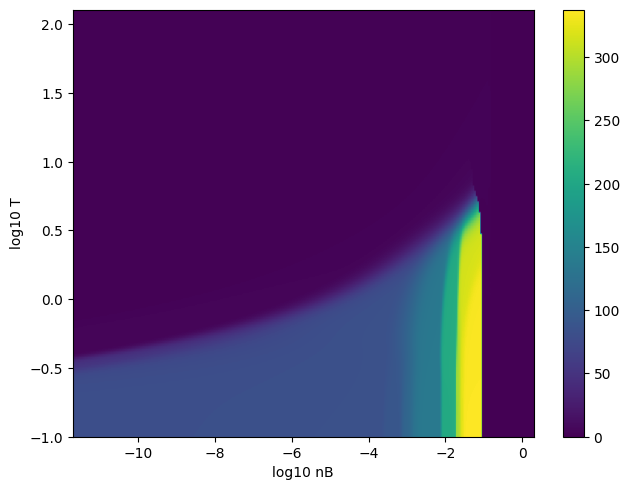

In [8]:
if plots:
    fig=plot.figure()
        
    ax=plot.axes([0.11,0.10,0.90,0.89])
    image=plot.imshow(A_slice.transpose(),origin='lower',
                      extent=[numpy.log10(nB_grid[0]),
                              numpy.log10(nB_grid[n_nB-1]),
                              numpy.log10(T_grid[0]),
                              numpy.log10(T_grid[n_T-1])],
                      aspect='auto')
    ax.set_xlabel('log10 nB')
    ax.set_ylabel('log10 T')
    cbar=fig.colorbar(image,ax=ax)
    plot.show()

In [9]:
def test_fun():
    assert numpy.allclose(A_point,337.5,rtol=1.0e-4)
    return